## Malayalam

Training data: (6455, 39), Test data: (1614, 39)


/dist_home/common-apps/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

   Kozhikode       0.74      0.70      0.72       359
    Kottayam       0.89      0.90      0.90       498
  Trivandrum       0.74      0.80      0.77       426
    Thrissur       0.74      0.69      0.71       331

    accuracy                           0.79      1614
   macro avg       0.78      0.77      0.78      1614
weighted avg       0.79      0.79      0.79      1614



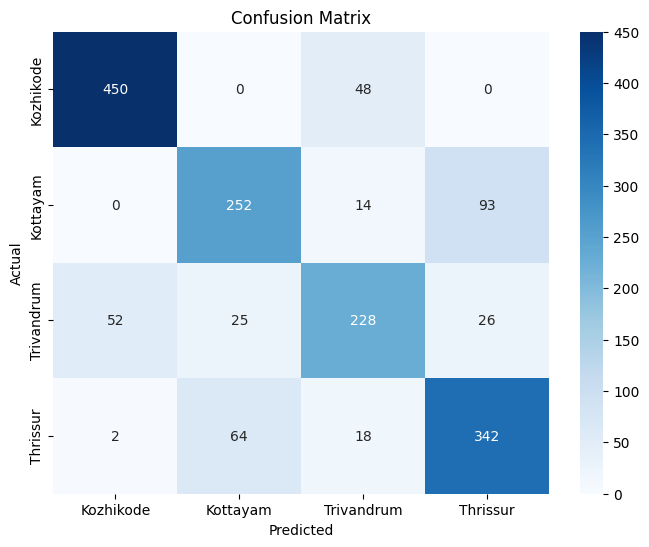

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Malayalam'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for Logistic Regression
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Tamil

Training data: (5947, 39), Test data: (1488, 39)
              precision    recall  f1-score   support

  Coimbatore       0.81      0.71      0.76       360
     Madurai       0.92      0.90      0.91       370
 Thoothukudi       0.91      0.93      0.92       390
     Chennai       0.75      0.83      0.79       368

    accuracy                           0.84      1488
   macro avg       0.85      0.84      0.84      1488
weighted avg       0.85      0.84      0.84      1488



/dist_home/common-apps/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


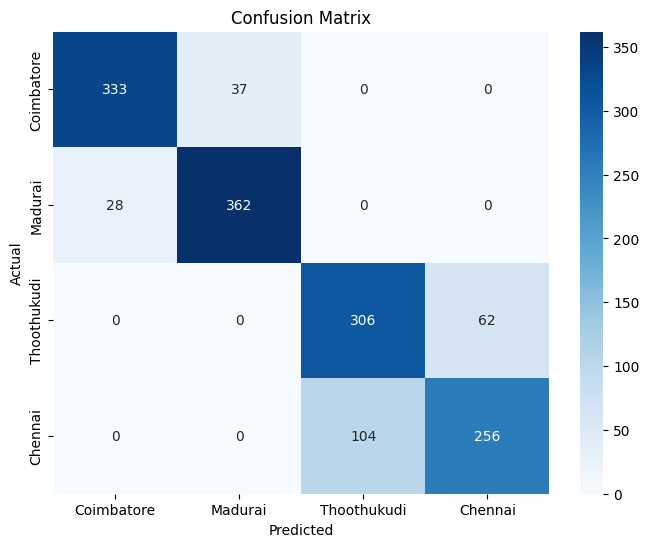

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Tamil'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for Logistic Regression
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Kannada

Training data: (6456, 39), Test data: (1615, 39)
              precision    recall  f1-score   support

   Kundapura       0.76      0.75      0.76       404
     Coastal       0.77      0.77      0.77       406
       North       0.68      0.67      0.67       403
     Mandhya       0.70      0.73      0.71       402

    accuracy                           0.73      1615
   macro avg       0.73      0.73      0.73      1615
weighted avg       0.73      0.73      0.73      1615



/dist_home/common-apps/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


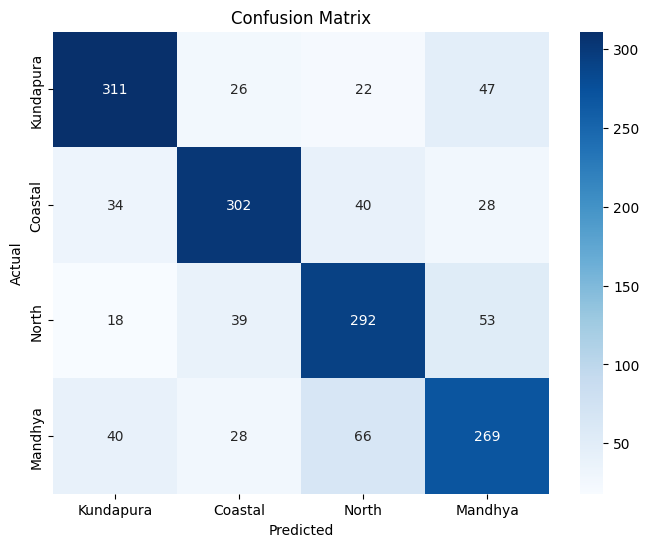

In [3]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Kannada'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for Logistic Regression
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
